Inga Ulusoy, Computational modelling in python, SoSe2020 

# Quantum mechanics and the time-independent Schrodinger equation: The particle in a box I

Reference:
https://doi.org/10.1021/acs.jchemed.7b00003

A standard problem in quantum chemistry is the particle in a box. This is a mostly educational example to illustrate fundamentals of quantum mechanics and the difference to classical mechanics. As the potential within the box is zero, it is the simplest example (apart from the free particle) in quantum mechanics.

In this example, a particle is contained in a box of length $L$, with zero potential within the box, and potential walls extending to infinity at both sides of the box: 

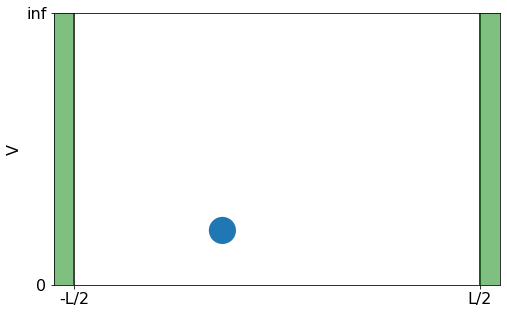

In [1]:
from numpy import *
from scipy import linalg as la

import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

mf=16
fig, ax = plt.subplots(figsize=(8,5))
ax.vlines(0,0,2)
ax.vlines(1,0,2)
plt.xticks(arange(2), ('-L/2', 'L/2'),fontsize=mf)
plt.yticks(arange(2), ('0','inf'),fontsize=mf)

ax.set_xlim(left=-0.05,right=1.05)
ax.set_ylim(bottom=0,top=1.0)

ax.vlines(-0.05,0,2, color='green', lw=40, alpha=0.5)
ax.vlines(1.05,0,2, color='green', lw=40, alpha=0.5)
ax2=fig.add_subplot(111,aspect='equal') 
circle=plt.Circle((0.3,0.2),0.05)
ax2.add_artist(circle)
ax2.axis('off')
ax.set_ylabel('V',fontsize=mf)
plt.show()

The Hamiltonian for this problem inside the box reads
\begin{align}
\hat{H} = \hat{T} + V = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}
\end{align}

We know the analytical solution to this problem - the wave functions for the 1D box are
\begin{align}
\Psi_n(x) =\sqrt{\frac{2}{L}} \sin\left(\frac{n \pi (x+L/2)}{L}\right)
\end{align}
and the corresponding energies are
\begin{align}
E_n =\frac{n^2 \pi^2 \hbar^2}{2mL^2}
\end{align}

## Difference to classical mechanics

For a classical particle in the box, the Hamiltonian reads
\begin{align}
H = T + V = \frac{p^2}{2m}
\end{align}
For a given energy of the particle, the momentum of the particle is
\begin{align}
p = \pm\sqrt{E\cdot2m}
\end{align}
and the particle moves either to the left (-) or the right (+). The position of the particle is completely undetermined (it could be anywhere in the box) unless an initial value is defined and the time evolution of the system is studied.

In quantum mechanics, the probability of finding the particle at a certain position $x$ for a given energy is __not equal__ for all $x$. And the possible values for the total energy of the system are not continuous __but discrete__. 

An example that highlights the difference between the mathematical representation of classical and quantum mechanics is the partition function $Q(T)$:
\begin{align}
Q_{CM}(T) = \frac{1}{h^3}\int \exp \left( -H/k_BT\right) dq^3 dp^3
\end{align}
The classical partition function is an __integral__ over all combinations of momenta $p$ and positions $q$ for a given energy determined by $H$ and reflects the continuous character of classical systems.

The quantum mechanical partition function is
\begin{align}
Q_{QM}(T) = \sum_{i} g_i \exp \left( -E_i/k_BT\right)
\end{align}
a __sum__ over all microstates with energies $E_i$ and reflects the discrete character of quantum systems.

## Matrix form of quantum mechanics

https://doi.org/10.1007/BF01328377 \
https://doi.org/10.1007/BF01379806 \
https://aapt.scitation.org/doi/10.1119/1.3009634

As quantum-mechanical systems exhibit discrete energies and their states can be described using functions (vectors), and operators like ${\hat{x}}$ and ${\hat{p}}$ are not commutative (cannot be determined simultaneously) this naturally leads to the emergence of __matrix mechanics__. In a computer representation, we need to resort to linear algebra, and all operations in quantum mechanics can be described by vector-vector and matrix-vector multiplication, and matrix diagonalization.

In the following, we will look at the matrix representation of the quantum particle in a box.

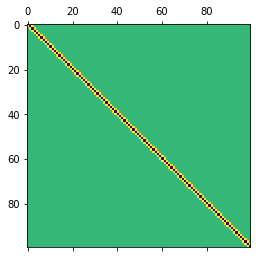

In [2]:
#atomic units
hbar=1.0
m=1.0
#set accuracy of numerical approximation
steps=100
#width of the box
w = 1
#grid along x
l = w/2
xgrid,h=linspace(-l,l,steps,retstep=True)
#get step size h for the numerical derivative
#create the second derivative matrix
Laplacian=(-2.0*diag(ones(steps))+diag(ones(steps-1),1)+diag(ones(steps-1),-1))/(float)(h**2)
#we can look at this matrix - it is a band matrix as only the j-1, j, and j+1 
#grid points are required for each second derivative - see lecture 5
#print(Laplacian)
plt.matshow(Laplacian)
plt.show()

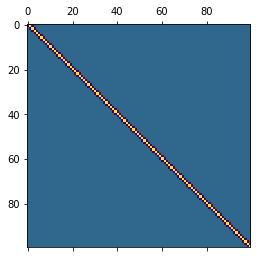

In [3]:
#now construct the Hamiltonian matrix
Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian
#print(Hamiltonian)
plt.matshow(Hamiltonian)
plt.show()

## Linear algebra

A set of linear algebraic equations looks like this
\begin{align}
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 + \ldots + a_{1N} x_N &= b_1 \\
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 + \ldots + a_{1N} x_N &= b_2 \\
\vdots & \\
a_{M1} x_1 + a_{M2} x_2 + a_{M3} x_3 + \ldots + a_{MN} x_N &= b_M
\end{align}
for $N$ unknowns $x$, $M$ equations relating the unknowns and known coefficients $a_{ij}$ with $i=1,2,\ldots,M$ and $j=1,2,\ldots,N$, and $b_i$'s.

For $N=M$, this system can probably be solved uniquely. There may be degeneracies so that there is no unique solution. A degeneracy occurs if for example one or more of the variables (or the equations) is a linear combination of any of the others (they are linearly dependent).

It can also lead to problems if some of the variables (equations) are not exactly linearly dependent but almost so and the numerical (floating-point) precision is not high enough to resolve this. For very large $N$, accumulated error can also lead to problems.

The coefficients $a_{ij}$ can be written as a matrix as
\begin{align}
\mathbf{A} = \begin{pmatrix} 
a_{11} & a_{12} & \ldots & a_{1N} \\
a_{21} & a_{22} & \ldots & a_{2N} \\
\vdots & & \ddots & \vdots \\
a_{M1} & a_{M2} & \ldots & a_{MN} \\
\end{pmatrix}
\end{align}
and the solutions $b_{j}$ as a column vector
\begin{align}
\mathbf{b} = \begin{pmatrix} 
b_{1} \\
b_{2} \\
\vdots \\
b_{M} \\
\end{pmatrix}
\end{align}
By convention, the first index denotes the row and the second the column of the matrix. Matrix elements are referenced as we have already discussed; but there are some perks to these that may not be obvious at first. How is the matrix stored in memory? Basically, there are two ways that it can be stored: Either in rows after rows or in columns after column. If you just like to access one element of a matrix, this does not really matter. But if you like to loop over rows and columns, for example in a matrix multiplication, then this may be faster if you access the elements in the order they are stored in memory (contiguous in memory). This way, every subsequent element is just an increment in the physical memory, and not at a completely different memory address.

Different programming languages unfortunately use different orders to store matrix elements in memory. Fortran for example uses __column-major order__, where consecutive elements of a column are stored next to each other (the first index $i$ runs fastest): $a_{12}$ and $a_{22}$ lie next to each other. In total, the array $\mathbf{A}$ is stored as $\mathbf{A}=a_{11},a_{21},\ldots,a_{M1},a_{12},a_{22},\ldots,a_{M2},\ldots,a_{1N},a_{2N},\ldots,a_{MN}$.

In C/C++ on the other hand, the order is __row-major order__ where the second index ($j$) runs fastest with consecutive elements $a_{12}$ and $a_{13}$. In total, the array $\mathbf{A}$ is stored as $\mathbf{A}=a_{11},a_{12},\ldots,a_{1N},a_{21},a_{22},\ldots,a_{2N},\ldots,a_{M1},a_{M2},\ldots,a_{MN}$.

Generally this will not be important for you, but whenever arrays are passed between languages (Lapack routines written in Fortran to python), you will see that the meaning of rows and columns in your matrix is not what you expect.

Numpy arrays are stored in row-major order unless explicitly specified.
`order = ‘C’` or `order = ‘F’`
(row-major (C-style) or column-major (Fortran-style) order).

## Matrix diagonalization or eigen decomposition

In time-independent quantum mechanics, matrix diagonalization is the most fundamental task that needs to be carried out. For all matrix manipulations, we use the linear algebra package from scipy (linalg) (we could also use numpy linalg but scipy has all the numpy routines plus a few additional ones). \
https://docs.scipy.org/doc/scipy/reference/linalg.html

Matrix diagonalization is the process of transforming a square matrix $\mathbf{M}$ into a diagonal matrix $\mathbf{D}$, and results in the eigenvectors (the set of vectors that diagonalizes $\mathbf{M}$) and eigenvalues $\lambda_i$ (the diagonal entries on $\mathbf{D}$). This corresponds to a basis transformation of the original matrix into a basis where the matrix is in its canonical form.
\begin{align}
\mathbf{M} =\mathbf{P} \mathbf{D} \mathbf{P}^{-1}
\end{align}
The matrix $\mathbf{P}$ contains the eigenvectors $\mathbf{P}_i$ for each eigenvalue $i$.

We can also write this as
\begin{align}
\mathbf{M} \mathbf{P}_i =  \lambda_i  \mathbf{P}_i
\end{align}
Look familiar? With $\mathbf{M}$ the Hamiltonian matrix, $\mathbf{P}_i$ the wave function of state $i$, and $\lambda_i$ the eigenvalue (energy) of state $i$, this is just the time-independent Schrödinger equation. So solving the TISE is equivalent to an eigen decomposition. With $\mathbf{M}$ a Hermitian (or, for real-valued Hamiltonians, symmetric) matrix, the eigenvalues $\lambda$ are real numbers and correspond to physical observables.

This transformation into the canonical form is extremely powerful, as it reduces the number of parameters of the matrix from $N \times N$ to just $N$, and it provides a linear map that transforms any subsequent matrix equation into the simpler form. As the "matrix diagonalization" yields the eigenvectors and eigenvalues, it is more precise to refer to it as "eigen decomposition", as the process decomposes the original matrix into the product of three matrices (of which one is diagonal). Matrix diagonalization is also required for matrix inversion ($\mathbf{M} \rightarrow \mathbf{M}^{-1}$) as matrices are inverted by transforming them into their diagonal form and then inverting the diagonal elements. For a singular or close-to-singular matrix (a matrix that is not invertible and has no eigen decomposition), singular value decomposition is used.

In all other cases, the eigen decomposition can be carried out using direct approaches, that directly decompose the matrix as a whole, and iterative routines like Davidson or Lanczos that operate on a subspace of the full matrix (Krylov space for Lanczos). Overall, eigen decomposition is complicated business, and depending on the kind of values in the matrix, different routines are chosen. For us this means that have to distinguish between real and complex matrices, symmetric and nonsymmetric matrices, and we need to be aware that different algorithms are used for the solution.

http://www.netlib.org/lapack/explore-html/db/d55/group__complex16_g_eeigen_ga0eb4e3d75621a1ce1685064db1ac58f0.html 
\
https://software.intel.com/content/www/us/en/develop/documentation/mkl-developer-reference-c/top/lapack-routines/lapack-least-squares-and-eigenvalue-problem-routines/lapack-least-squares-and-eigenvalue-problem-driver-routines/nonsymmetric-eigenvalue-problems-lapack-driver-routines/geev.html


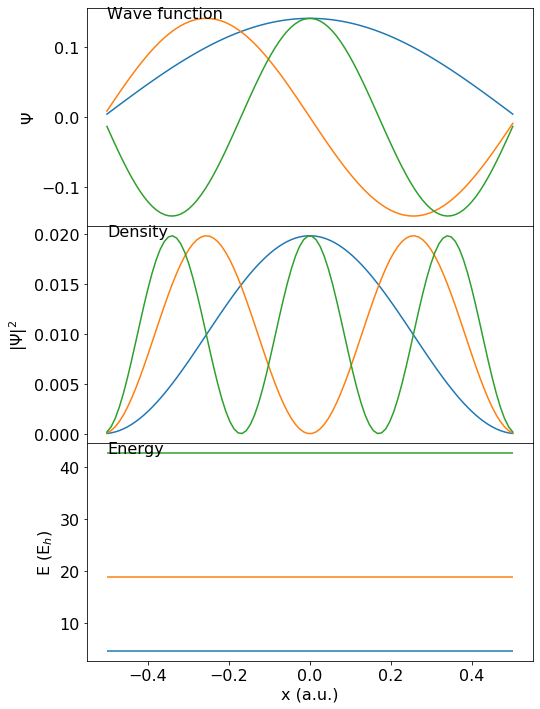

In [6]:
#diagonalize the Hamiltonian (Hermitian/symmetric matrix, uses Lapack dsyevd routine)
#DOES NOT CHECK THAT YOUR MATRIX IS HERMITIAN/SYMMETRIC SO YOU NEED TO BE SURE ABOUT IT
eigenval, eigenvec = la.eigh(Hamiltonian)
#print(eigenvec)
#print(eigenval)

n=3
fig, ax = plt.subplots(3,figsize=(8,4*3),sharex=True)
#plot 1
#Column-major order from Fortran leads to the unexpected indexing of the eigenvectors
#we could also transpose the eigenvectors using transpose() or .T
ax[0].plot(xgrid,eigenvec[:,0])
ax[0].plot(xgrid,eigenvec[:,1])
ax[0].plot(xgrid,eigenvec[:,2])
ax[0].set_ylabel('$\Psi$',fontsize=mf)
ax[0].text(-l,max(eigenvec[:,0]),'Wave function',fontsize=mf)

#plot 2
ax[1].plot(xgrid,eigenvec[:,0]**2)
ax[1].plot(xgrid,eigenvec[:,1]**2)
ax[1].plot(xgrid,eigenvec[:,2]**2)
ax[1].set_ylabel('$|\Psi|^2$',fontsize=mf)
ax[1].text(-l,max(eigenvec[:,0]**2),'Density',fontsize=mf)

#plot 3
for i in range(n):
    ax[2].hlines(eigenval[i],-l,l,color=colors[i])
ax[2].set_xlabel('x (a.u.)',fontsize=mf)
ax[2].set_ylabel('E (E$_h$)',fontsize=mf)
ax[2].text(-l,eigenval[n-1],'Energy',fontsize=mf)

for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=mf)
    ax[i].yaxis.set_tick_params(labelsize=mf)
    
plt.subplots_adjust(hspace = 0.0)
plt.show()

## Question 1: How many energy eigenstates do you obtain upon diagonalization? Why is that so?
## Question 2: What happens to the energy of the states if you increase the length of the box?

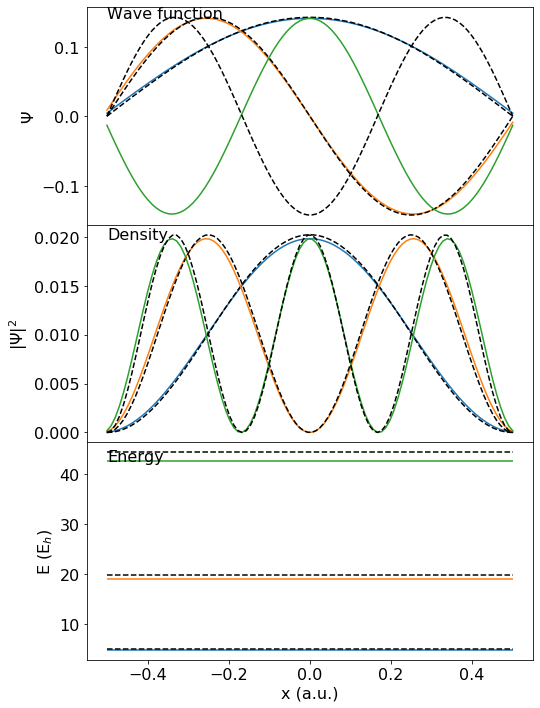

In [7]:
#we can compare this to the analytical solution
def get_wave(xgrid,w):
    steps=len(xgrid)
    h=xgrid[1]-xgrid[0]
    ww = empty((steps,steps))
    prefac=sqrt(2*h/w)
    for i in range(1,steps+1):
        angle = i * pi * linspace(0,w,steps)/w
        ww[i-1] = sin(angle)*prefac
    return ww

def get_ene(n,w):
    ene=empty(n)
    for i in range(1,n+1):
        ene[i-1] = i**2 * pi**2 / (2*w**2)
    return ene

wavef=get_wave(xgrid,w)
ene = get_ene(n,w)

fig, ax = plt.subplots(3,figsize=(8,4*3),sharex=True)
#plot 1
ax[0].plot(xgrid,eigenvec[:,0])
ax[0].plot(xgrid,wavef[0],color='black',linestyle = '--')
ax[0].plot(xgrid,eigenvec[:,1])
ax[0].plot(xgrid,wavef[1],color='black',linestyle = '--')
ax[0].plot(xgrid,eigenvec[:,2])
ax[0].plot(xgrid,wavef[2],color='black',linestyle = '--')
ax[0].set_ylabel('$\Psi$',fontsize=mf)
ax[0].text(-l,max(eigenvec[:,0]),'Wave function',fontsize=mf)

#plot 2
ax[1].plot(xgrid,eigenvec[:,0]**2)
ax[1].plot(xgrid,wavef[0]**2,color='black',linestyle = '--')
ax[1].plot(xgrid,eigenvec[:,1]**2)
ax[1].plot(xgrid,wavef[1]**2,color='black',linestyle = '--')
ax[1].plot(xgrid,eigenvec[:,2]**2)
ax[1].plot(xgrid,wavef[2]**2,color='black',linestyle = '--')
ax[1].set_ylabel('$|\Psi|^2$',fontsize=mf)
ax[1].text(-l,max(eigenvec[:,0]**2),'Density',fontsize=mf)

for i in range(n):
    ax[2].hlines(eigenval[i],-l,l,color=colors[i])
    ax[2].hlines(ene[i],-l,l,color='black',linestyle = '--')
ax[2].set_xlabel('x (a.u.)',fontsize=mf)
ax[2].set_ylabel('E (E$_h$)',fontsize=mf)
ax[2].text(-l,eigenval[n-1],'Energy',fontsize=mf)

for i in range(3):
    ax[i].xaxis.set_tick_params(labelsize=mf)
    ax[i].yaxis.set_tick_params(labelsize=mf)

plt.subplots_adjust(hspace = 0.0)
plt.show()

## Question 3: How do the analytical and numerical solution to the particle in a box compare in terms of accuracy for the first ten states? How can you influence this?

In [9]:
#now we can compute expectation values
def get_x(wavef,w,nsteps,n):
    xgrid = linspace(-w/2,w/2,nsteps)
    #xgrid = linspace(0,w,nsteps)
    expec = zeros(n)
    for i in range(1,n+1):
        psi_x_psi = wavef[:,i-1]*xgrid*wavef[:,i-1]
        expec[i-1] = sum(psi_x_psi)
    return expec

def get_x_all(wavef,w,nsteps):
    xgrid = linspace(-w/2,w/2,nsteps)
    #xgrid = linspace(0,w,nsteps)
    expec = zeros(nsteps)
    psi_x_psi = conj(wavef.T)*xgrid*wavef.T
    expec = sum(psi_x_psi,axis=1)
    return expec

myx = get_x(eigenvec,w,steps,3)
print(myx)
myx = get_x_all(eigenvec,w,steps)
print(myx)

[ 8.99638521e-14 -8.28790026e-14  5.17588630e-15]
[ 8.99638521e-14 -8.28790026e-14  5.17588630e-15  3.01337731e-14
 -3.84956281e-14  6.51318192e-15 -3.56359907e-14  2.82534413e-14
 -1.46692554e-16 -1.43834597e-14  8.22519136e-15 -2.42319186e-15
  1.02353022e-14 -4.19586241e-15 -3.31679129e-15  3.86669863e-15
 -7.87390986e-15  1.12193241e-15  2.81025203e-15  1.87306767e-15
 -3.40873163e-16 -3.56919355e-15  1.18828558e-15 -3.19362592e-15
  7.87737930e-15 -5.49907342e-15 -1.10328413e-15  5.09141340e-16
 -1.78156101e-15  8.82106888e-16  1.15359111e-15 -2.55958449e-15
  6.14178847e-15 -7.05858982e-15 -1.22211269e-15  6.93889390e-17
  3.35322048e-15 -1.68094705e-15  3.64812347e-15 -3.47638585e-15
 -1.49533164e-15 -5.65519853e-16  2.93688684e-15  1.62543590e-15
 -4.14598911e-15  4.35068648e-15 -8.45157277e-15  4.04537515e-15
 -1.12583554e-15  8.81239526e-16  2.52228793e-15 -1.78676518e-15
  1.82319437e-15 -2.99586744e-15 -5.01335085e-16 -3.48505946e-15
  2.30371278e-15  2.86055901e-15 -4.3021

# Task 1: 
Answer the above three questions in the moodle quiz.

# Task 2:
Generate a function to obtain $\langle x^2 \rangle$ and compute the uncertainty of $x$, $\sqrt{\langle x^2 \rangle - \langle x \rangle^2}$, for the first ten states.

What happens if you increase $L$?

Write your answer into the box for the corresponding moodle questions.

# Optional 
Implement the case of a two-dimensional box.
Upload your solution to moodle.